In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/text_classification'

/content/drive/MyDrive/text_classification


### **Cài thư viện cần thiết**

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

### **Train trên tập imdb**

In [48]:
# tạo thông số
vocabulary_size = 10000
max_len = 300

# lấy dữ liệu từ imdb
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocabulary_size)

print(len(x_train))
print(len(x_val))

# chuẩn hóa dữ liệu
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=max_len)



25000
25000


In [ ]:
# chiều của các từ
embedding_dim = 128

# tạo đầu vào có kích thước 300x1
input = keras.Input(shape=(300,), dtype='int64')

# embedding để các từ có ý nghĩa hơn
x = layers.Embedding(vocabulary_size, embedding_dim)(input)

# đưa vào mạng fully connected
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)

predictions = layers.Dense(1, activation='sigmoid')(x)

# tạo model với đầu vào là input, đầu ra là dự đoán hàm sigmoid
model = keras.Model(input, predictions)
model.summary()


In [51]:
# vào training
model.compile("adam", "binary_crossentropy", metrics="accuracy")
history=model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
782/782 [==============================] - 56s 68ms/step - loss: 0.3876 - accuracy: 0.8152 - val_loss: 0.3081 - val_accuracy: 0.8672
Epoch 2/20
782/782 [==============================] - 24s 31ms/step - loss: 0.0633 - accuracy: 0.9788 - val_loss: 0.5522 - val_accuracy: 0.8455
Epoch 3/20
782/782 [==============================] - 18s 24ms/step - loss: 0.0223 - accuracy: 0.9914 - val_loss: 0.7000 - val_accuracy: 0.8469
Epoch 4/20
782/782 [==============================] - 18s 23ms/step - loss: 0.0159 - accuracy: 0.9946 - val_loss: 0.7103 - val_accuracy: 0.8457
Epoch 5/20
782/782 [==============================] - 17s 22ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.8074 - val_accuracy: 0.8513
Epoch 6/20
782/782 [==============================] - 17s 22ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.8929 - val_accuracy: 0.8468
Epoch 7/20
782/782 [==============================] - 18s 22ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.8525 - val_accuracy:

### **Vẽ kết quả**

<Figure size 1000x1000 with 0 Axes>

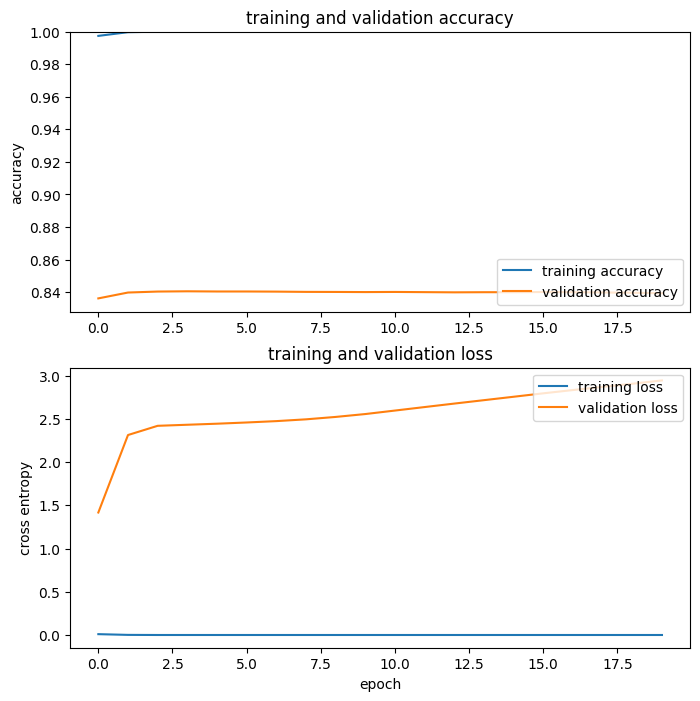

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='training accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('training and validation accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.ylabel('cross entropy')
plt.title('training and validation loss')
plt.xlabel('epoch')
plt.show()


### **Test 1 câu nào đó ( bị overfitting rồi ) =))**

In [81]:
test_sentences = ['The weather is beautiful today']
test_seq = tokenizer.texts_to_sequences(test_sentences)
padding_sequences = pad_sequences(test_seq, maxlen=max_len, padding='post')

In [82]:
print(padding_sequences)

[[1 1 7 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]


In [83]:
model.predict(padding_sequences)

1/1 [==============================] - 0s 102ms/step


array([[0.9940215]], dtype=float32)

In [85]:
# I killed her
test_sentences = ['I killed her']
test_seq = tokenizer.texts_to_sequences(test_sentences)
padding_sequences = pad_sequences(test_seq, maxlen=max_len, padding='post')

model.predict(padding_sequences)

1/1 [==============================] - 0s 19ms/step


array([[0.99893767]], dtype=float32)

In [86]:
# I'm excited about the possibilities that the future holds
test_sentences = ['I am excited about the possibilities that the future holds']
test_seq = tokenizer.texts_to_sequences(test_sentences)
padding_sequences = pad_sequences(test_seq, maxlen=max_len, padding='post')

model.predict(padding_sequences)

1/1 [==============================] - 0s 19ms/step


array([[0.99988186]], dtype=float32)

In [87]:
# I'm disappointed with the results
test_sentences = ['I am disappointed with the results']
test_seq = tokenizer.texts_to_sequences(test_sentences)
padding_sequences = pad_sequences(test_seq, maxlen=max_len, padding='post')

model.predict(padding_sequences)

1/1 [==============================] - 0s 19ms/step


array([[0.9999895]], dtype=float32)

In [89]:
print(model.layers[1].weights[0])

<tf.Variable 'embedding_3/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
array([[-0.00213159, -0.0096283 , -0.00254285, ...,  0.00718061,
         0.0047153 , -0.00906017],
       [ 0.06182769,  0.06670208,  0.10015028, ...,  0.09036087,
        -0.03655179,  0.1684651 ],
       [ 0.01644639, -0.04228038, -0.01810914, ..., -0.04347404,
        -0.02097364,  0.01598992],
       ...,
       [-0.00227878,  0.04251161,  0.04265101, ...,  0.0089689 ,
         0.11286025, -0.03400406],
       [-0.00128897,  0.12049455,  0.08937079, ..., -0.0412159 ,
        -0.05388764, -0.02327902],
       [-0.093241  ,  0.03929772, -0.01807935, ...,  0.05887542,
         0.04126043,  0.0121469 ]], dtype=float32)>


In [90]:
print(model.layers[1].weights[0].shape)

(10000, 128)
